In [1]:
#pip install missingno
import pandas as pd
import numpy as np
import csv
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/PHA/PHA_data.csv")
#df

C:\Users\jornk\AppData\Local\Temp\ipykernel_21296\2215263521.py:1: DtypeWarning: Columns (2,3,5,6,7,8,9,10,22,29,30,42,43,58,59,62,63,64,65,66,67,68,69,70,72,74,76,80,81,103,105,110,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datasets/PHA/PHA_data.csv")


,c5,c1,c2,c3,c4,c6,c7,c8,c9,c10,...,c154,c156,c158,c161,c163,c183,c191,c229,c230,end_of_record
0,19900101002959I,I,121,-5,F,1990,1,1,19900101,1100,...,,,,Smoke/Fumes In Cockp,Unscheduled Landing,,,NaN,NaN,
1,19900101003319I,I,091,-5,F,1990,1,1,19900101,1749,...,,,,,,Pilot and Ground Cre,,NaN,NaN,
2,19900102000039A,A,091,.4,N,1990,1,2,19900102,1030,...,UNDER 750 HP,RECIPROCATING-OPPOSED,,,,Pilot and Ground Cre,,NaN,NaN,
3,19900102008189I,I,121,-5,F,1990,1,2,19900102,0840,...,,,Wheeled-Tricycle,,,Pilot and Ground Cre,,NaN,NaN,
4,19900103001451A,A,091,.4,N,1990,1,3,19900103,1500,...,UNDER 750 HP,RECIPROCATING-OPPOSED,,,,,,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116920,20211009022069I,I,091,,,2021,10,9,20211009,1700,...,,,Wheeled-Tricycle,,,,,19870402.0,NaN,
116921,20210925022059I,I,105,,,2021,9,25,20210925,1300,...,,,Wheeled-Tricycle,,,,,NaN,NaN,
116922,20210705022029I,I,091,,,2021,7,5,20210705,1630,...,,,Wheeled-Tricycle,,,,,19570421.0,NaN,
116923,20210718022039A,A,091,,,2021,7,18,20210718,855,...,,,Wheeled-Tricycle,,,,,19520305.0,NaN,


In [3]:
# Cargamos leyenda y eliminamos campos erroneos
info_path = 'Datasets/PHA/info/Afilelayout.txt'
# Convertimos la descripción de las columnas en un diccionario para que el acceso sea sencillo y rápido
dic_legend = {}

with open(info_path) as file:
    reader = csv.reader(file)
    next(reader) # Descartamos cabecera
    for row in reader:
        dic_legend[row[0]] = row[1:5]


del dic_legend['<<<<<<< HEAD']
del dic_legend['=======']
del dic_legend['end_of_record']
del dic_legend['>>>>>>> wip/victor']
#print(dic_legend)
#print('[+] Numero de registros: ', len(dic_legend))

In [4]:
# contamos valores faltantes y representamos

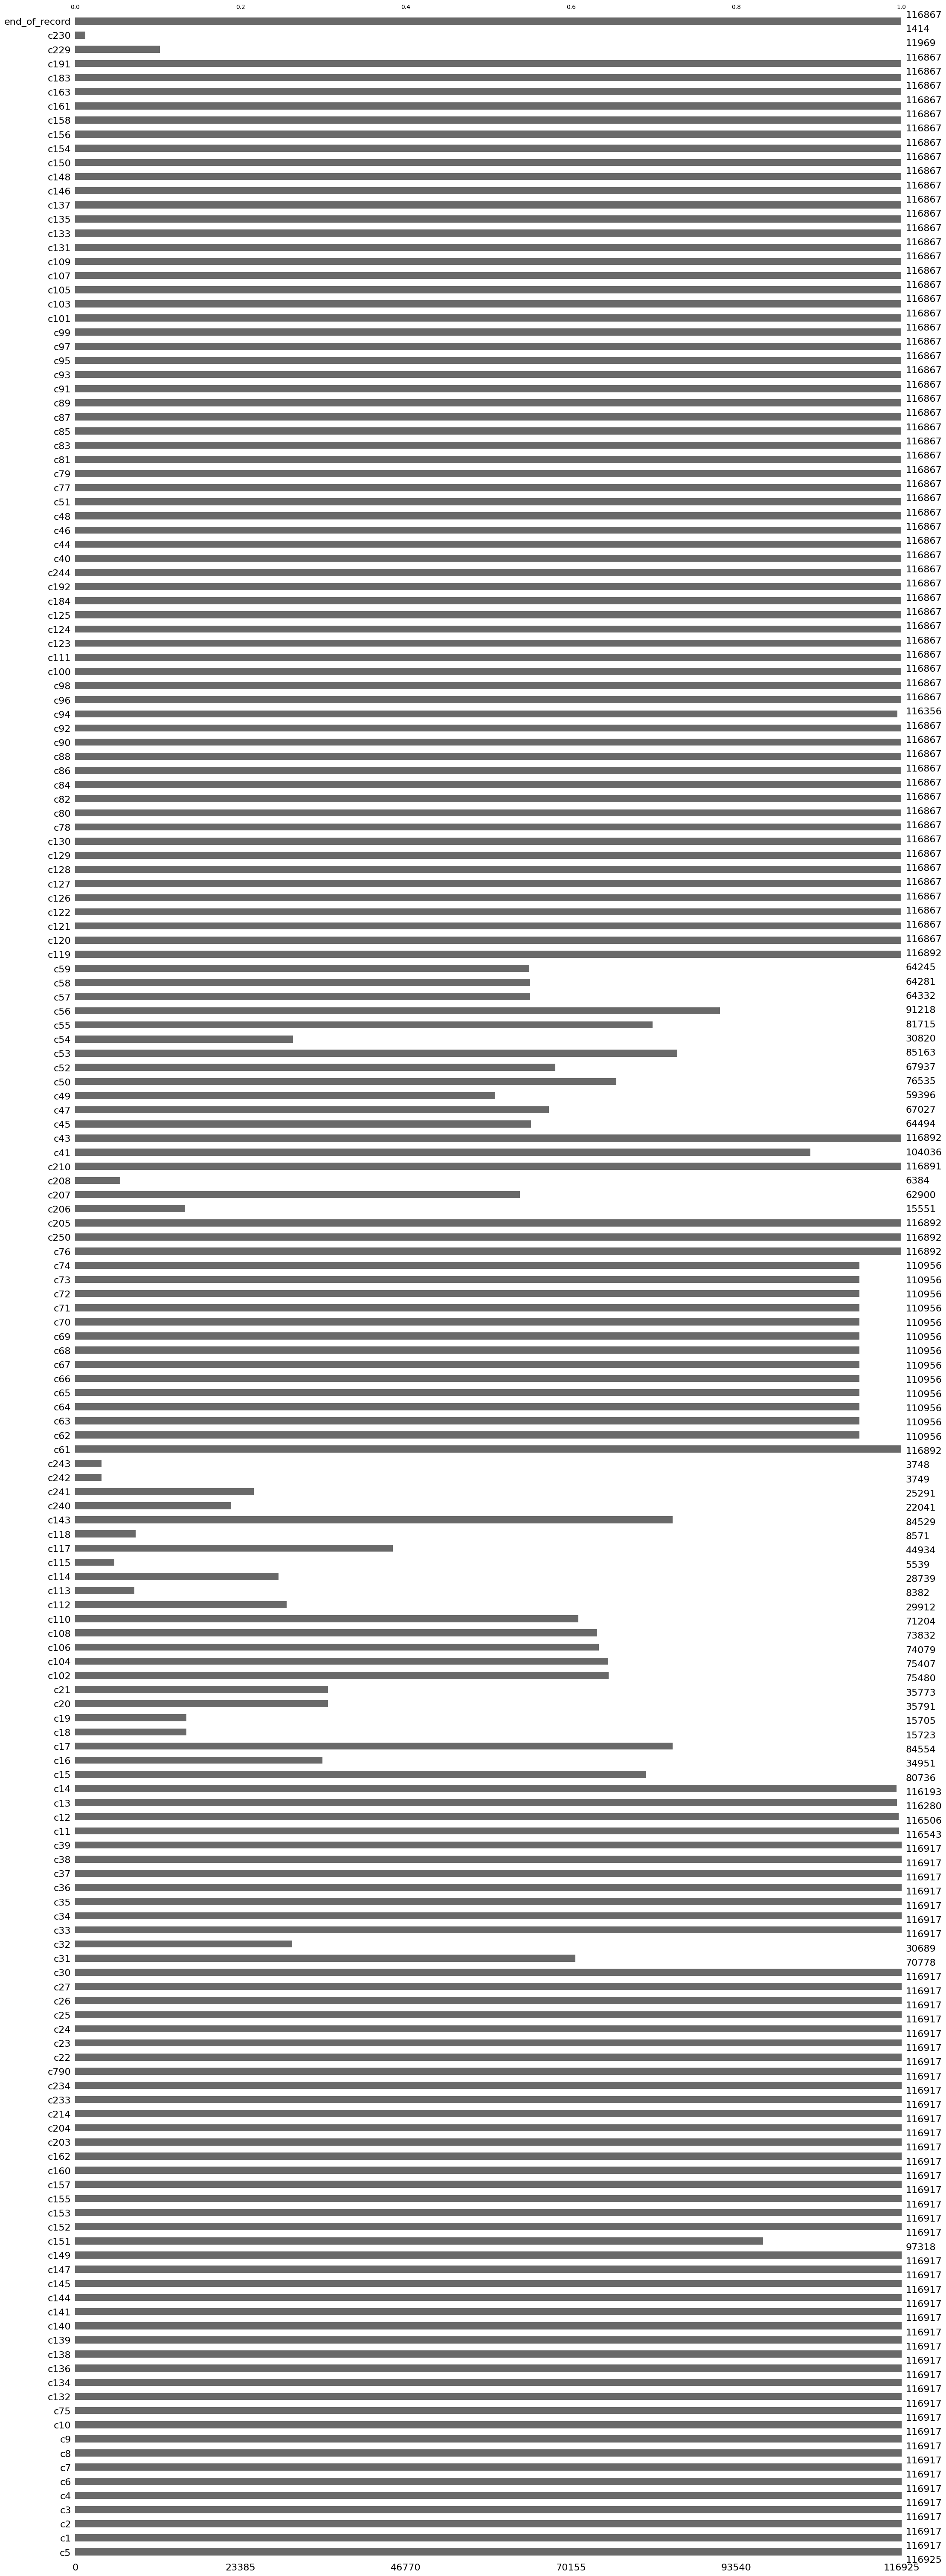

In [5]:
df[df == '?'] = np.nan
msno.bar(df)
plt.show()

In [6]:
# mostrar equivalencia entre descripción y nombre columna
for nombre in dic_legend:
    des = dic_legend.get(nombre)[2]
    print("{} tiene como descripción {} ".format(nombre, des))

c5 tiene como descripción Unique control number used to relate to AID_MAIN table. 
c1 tiene como descripción Type of Event 
c2 tiene como descripción FAR part number 
c3 tiene como descripción Form on which the latest data was received. 
c4 tiene como descripción Agency conducting investigation. 
c6 tiene como descripción Year the accident/incident happened. 
c7 tiene como descripción Month the accident/incident happened. 
c8 tiene como descripción Day the accident/incident happened. 
c9 tiene como descripción Date the accident/incident happened. 
c10 tiene como descripción Local time of the accident/incident. 
c75 tiene como descripción First second or third airplane involved or Not a midair. 
c132 tiene como descripción First remedial action area code 
c134 tiene como descripción First remedial action taken code 
c136 tiene como descripción Second remedial action area code 
c138 tiene como descripción Second remedial action taken code 
c139 tiene como descripción Code for related rep

In [ ]:
# primera eliminación de columnas con muchos datos faltantes
df = df.dropna(thresh=100000, axis=1)

In [13]:
# Alternativa menos visual para conteo de valores faltantes
#Pasamos caracteres raros a nan para poder identificarlos
#df[df == '?'] = np.nan

miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]

print(f"Número de columnas con datos faltantes: {miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
    print("Recuento de valores nulos por columna: ")
    for name, miss_vals in miss_values_count.items():
        p = miss_vals > 1
        print(f"  - A la columna '{name}', le falta {'n ' if p else ''}"
              f"{miss_vals} dato{'s' if p else ''}.")

Número de columnas con datos faltantes: 136
Recuento de valores nulos por columna: 
  - A la columna 'c1', le falta n 8 datos.
  - A la columna 'c2', le falta n 8 datos.
  - A la columna 'c3', le falta n 8 datos.
  - A la columna 'c4', le falta n 8 datos.
  - A la columna 'c6', le falta n 8 datos.
  - A la columna 'c7', le falta n 8 datos.
  - A la columna 'c8', le falta n 8 datos.
  - A la columna 'c9', le falta n 8 datos.
  - A la columna 'c10', le falta n 8 datos.
  - A la columna 'c75', le falta n 8 datos.
  - A la columna 'c132', le falta n 8 datos.
  - A la columna 'c134', le falta n 8 datos.
  - A la columna 'c136', le falta n 8 datos.
  - A la columna 'c138', le falta n 8 datos.
  - A la columna 'c139', le falta n 8 datos.
  - A la columna 'c140', le falta n 8 datos.
  - A la columna 'c141', le falta n 8 datos.
  - A la columna 'c144', le falta n 8 datos.
  - A la columna 'c145', le falta n 8 datos.
  - A la columna 'c147', le falta n 8 datos.
  - A la columna 'c149', le falta 

In [9]:
# imputación de valores en columnas con datos faltantes